In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
config_file = 'deploy.prototxt'  # Path to the config file
weights = 'mobilenet_iter_73000.caffemodel'  # Path to the weights file

In [6]:
# Step 2: Use a pretrained DNN model (MobileNet-SSD v3)
net = cv2.dnn.readNetFromCaffe(config_file, weights)

In [7]:
# Step 4: Create a class label and print the same
class_labels = {0: 'background', 1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat',
                5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 9: 'chair', 10: 'cow', 11: 'diningtable',
                12: 'dog', 13: 'horse', 14: 'motorbike', 15: 'person', 16: 'pottedplant', 17: 'sheep',
                18: 'sofa', 19: 'train', 20: 'tvmonitor'}

In [9]:
# Step 5: Read the image
image = cv2.imread('download.webp')  # Replace with your image path
(h, w) = image.shape[:2]

In [10]:
# Convert image to RGB for displaying with Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [11]:
# Create a blob for DNN processing
blob = cv2.dnn.blobFromImage(image, 0.007843, (300, 300), 127.5)

In [12]:
# Step 6: Set the model and threshold to 0.5
net.setInput(blob)
detections = net.forward()

In [13]:
# Step 7: Flatten the index, confidence
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]

    if confidence > 0.5:  # Confidence threshold
        index = int(detections[0, 0, i, 1])  # Get class index
        label = class_labels[index]  # Get label name
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
# Step 8: Draw rectangles and labels on the image
        cv2.rectangle(image_rgb, (startX, startY), (endX, endY), (0, 255, 0), 2)
        cv2.putText(image_rgb, label, (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

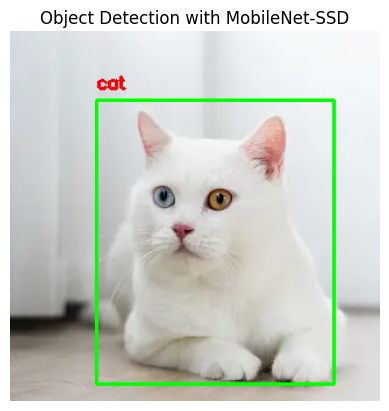

In [14]:
# Step 9: Display the image using Matplotlib
plt.imshow(image_rgb)
plt.title("Object Detection with MobileNet-SSD")
plt.axis("off")
plt.show()